# <center> Kaggle Titanic
**by Hyrisky He**

Some notes here: In order to improve my practical python coding ablity and to better master, I will divide the codes into few parts and interpret the process that I made in each steps.

### 1. Read CSV

observe raw data

In [5]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("../data/titanic_train.csv")
test_data = pd.read_csv("../data/titanic_test.csv")
combine = [train_data, test_data]
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


observe data frame

In [9]:
print('\n Train Data Info:')
print('shape of data: ', train_data.shape, '\n')
train_data.info()
print('_'*40)
print('\n Test Data Info: ')
print('shape of data: ', test_data.shape, '\n')
test_data.info()


 Train Data Info:
shape of data:  (891, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________

 Test Data Info: 
shape of data:  (418, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #  

observe the csv and check the format of data\
`describe()` show titles and values

In [13]:
# Let's see the distribution of numerical features
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Let's see the distribution of categorical features
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


We can tell from the sheet that about 38 percent of passagers survived, and this number is related with Pclass, Age, etc. So we will try to find the connection between them.

Text(0.5, 1.0, 'Fare')

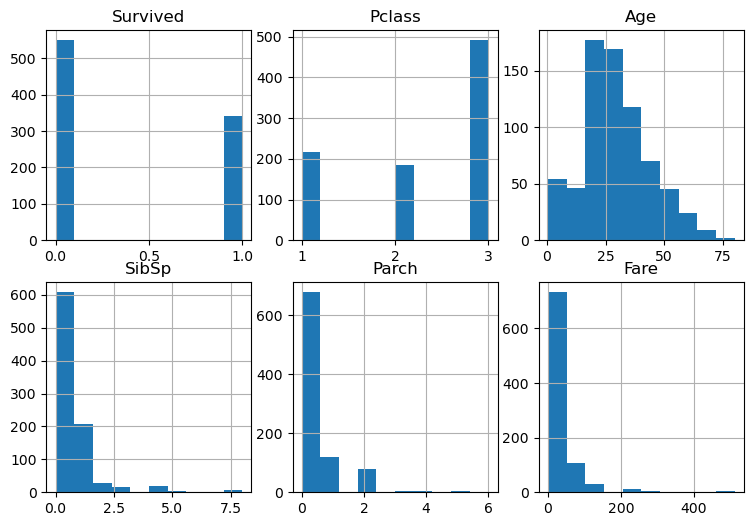

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# draw a histogram for each numerical feature

plt.subplot2grid((2,3),(0,0))
train_data.Survived.hist(figsize=(9,6))
plt.title('Survived')

plt.subplot2grid((2,3),(0,1))
train_data.Pclass.hist(figsize=(9,6))
plt.title('Pclass')

plt.subplot2grid((2,3),(0,2))
train_data.Age.hist(figsize=(9,6))
plt.title('Age')

plt.subplot2grid((2,3),(1,0))
train_data.SibSp.hist(figsize=(9,6))
plt.title('SibSp')

plt.subplot2grid((2,3),(1,1))
train_data.Parch.hist(figsize=(9,6))
plt.title('Parch')

plt.subplot2grid((2,3),(1,2))
train_data.Fare.hist(figsize=(9,6))
plt.title('Fare')